In [2]:
#data base connection
import csv
import pandas
from sshtunnel import SSHTunnelForwarder
import pymysql

#specifiy the path for your file
with open('/Users/QN/Desktop/THIRD crowdperm/user.txt') as f:
    lines = f.read().splitlines()    
f.close()


server =    SSHTunnelForwarder(
         ('juhu.soic.indiana.edu'),
         ssh_username=lines[0],
         ssh_password=lines[1],
         remote_bind_address=('127.0.0.1', 3306))
server.start()
cnx = pymysql.connect(host='127.0.0.1',
                           port=server.local_bind_port,
                           user='mturk',
                           passwd='m+turk=my-sql',
                           db='mturk')
cnx.set_charset('utf8')  
cursor = cnx.cursor()

### How people are dealing with the new model?

### How many people using Android Marshmallow have changed permissions? (reported by users)
Q. Have you ever changed whether an app was able to access some information on your phone, for example, contacts or photos?

Yes No

(NA) means that they don't know that they can change the permissions. They answered the previous question with No: If you wanted to change whether an app had access to some information on your phone, for example, contacts or photos, could you do that?

Yes No

In [2]:
query = ("select everChanged, count(*) from survey2 group by everChanged order by count(*) DESC")
#cursor.execute(query)

#read the survey2 table into a dataframe
everChanged=pandas.read_sql_query(query, cnx) 
#ignore the empty one
everChanged=everChanged[everChanged['everChanged']!='']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in everChanged.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
#coding the comfort level questions for stories
print ("Ever changed permissions\t", "count\t\t","%")
for index, row in everChanged.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    print (row['everChanged'],"\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)

Ever changed permissions	 count		 %
Yes 				 186 		 60.78
No 				 93 		 30.39
NA 				 27 		 8.82


### Are people aware that they enabled all permissions for an app?
Around 77% of participants are aware about enabling all permissions for the app that we asked about.

In [3]:
query = ("select enabledallAware, count(*) from survey2 group by enabledallAware order by count(*) DESC")
#cursor.execute(query)

#read the survey2 table into a dataframe
enabledallAware=pandas.read_sql_query(query, cnx) 
#ignore the empty one
enabledallAware=enabledallAware[enabledallAware['enabledallAware']!='NA']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in enabledallAware.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
#coding the comfort level questions for stories
print ("Aware about enabling all\t", "count\t\t","%")
for index, row in enabledallAware.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    print (row['enabledallAware'],"\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)

Aware about enabling all	 count		 %
Yes 				 209 		 76.56
No 				 64 		 23.44


#### Do users tend to allow specific permissions to apps more than others (find patterns)? (background data)


In [9]:
#prepare fraction of allowed permission data


query = ("select * from permissions where targetSDK>22")

cursor.execute(query)


#for (x) in cursor:
  #print("{}".format(x))

requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
fraction={'MICROPHONE':0.0,'LOCATION':0.0,'CAMERA':0.0,'CONTACTS':0.0,'PHONE':0.0,'STORAGE':0.0,'CALENDAR':0.0,'SENSORS':0.0,'SMS':0.0}

with open('permissionFractions_out.csv','w') as out:
    #myFields = ['TurkerID', 'number of permissions requested for microphone', 'number of permissions requested for location', 'number of permissions requested for camera', 'number of permissions requested for contacts', 'number of permissions requested for phone', 'number of permissions requested for storage', 'number of permissions requested for calendar','number of permissions requested sensor','number of permissions requested sms','number of permissions granted for microphone', 'number of permissions granted for location', 'number of permissions granted for camera', 'number of permissions granted for contacts', 'number of permissions granted for phone', 'number of permissions granted for storage', 'number of permissions granted for calendar','number of permissions granted sensor','number of permissions granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
   # myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms']
    myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms','fraction of apps granted microphone', 'fraction of apps granted location', 'fraction of apps granted camera', 'fraction of apps granted contacts', 'fraction of apps granted phone', 'fraction of apps granted storage', 'fraction of apps granted calendar','fraction of apps granted sensor','fraction of apps granted sms']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    prevTurk = 'nonsense'
    check = -1
    for row in cursor:
        if row[1] != prevTurk:
                if check != -1:
                    #writer.writerow({'TurkerID':prevTurk,'number of permissions requested for microphone':requestedPerm['MICROPHONE'], 'number of permissions requested for location':requestedPerm['LOCATION'], 'number of permissions requested for camera':requestedPerm['CAMERA'], 'number of permissions requested for contacts':requestedPerm['CONTACTS'], 'number of permissions requested for phone':requestedPerm['PHONE'], 'number of permissions requested for storage':requestedPerm['STORAGE'], 'number of permissions requested for calendar':requestedPerm['CALENDAR'],'number of permissions requested sensor':requestedPerm['SENSORS'],'number of permissions requested sms':requestedPerm['SMS'],'number of permissions granted for microphone':grantedPerm['MICROPHONE'], 'number of permissions granted for location':grantedPerm['LOCATION'], 'number of permissions granted for camera':grantedPerm['CAMERA'], 'number of permissions granted for contacts':grantedPerm['CONTACTS'], 'number of permissions granted for phone':grantedPerm['PHONE'], 'number of permissions granted for storage':grantedPerm['STORAGE'], 'number of permissions granted for calendar':grantedPerm['CALENDAR'],'number of permissions granted sensor':grantedPerm['SENSORS'],'number of permissions granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    #writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    #writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS']})
                    if requestedPerm['MICROPHONE']!=0:
                        fraction['MICROPHONE']= grantedPerm['MICROPHONE']/requestedPerm['MICROPHONE']                
                    else:
                        fraction['MICROPHONE']=0
                    
                    if requestedPerm['LOCATION']!=0:
                        fraction['LOCATION']= grantedPerm['LOCATION']/requestedPerm['LOCATION']                
                    else:
                        fraction['LOCATION']=0
                    
                    if requestedPerm['CAMERA']!=0:
                        fraction['CAMERA']= grantedPerm['CAMERA']/requestedPerm['CAMERA']                
                    else:
                        fraction['CAMERA']=0
                     
                    if requestedPerm['CONTACTS']!=0:
                        fraction['CONTACTS']= grantedPerm['CONTACTS']/requestedPerm['CONTACTS']                
                    else:
                        fraction['CONTACTS']=0
                     
                    if requestedPerm['PHONE']!=0:
                        fraction['PHONE']= grantedPerm['PHONE']/requestedPerm['PHONE']                
                    else:
                        fraction['PHONE']=0
                      
                    if requestedPerm['CALENDAR']!=0:
                        fraction['CALENDAR']= grantedPerm['CALENDAR']/requestedPerm['CALENDAR']                
                    else:
                        fraction['CALENDAR']=0
                    
                    if requestedPerm['SENSORS']!=0:
                        fraction['SENSORS']= grantedPerm['SENSORS']/requestedPerm['SENSORS']                
                    else:
                        fraction['SENSORS']=0
                    
                    if requestedPerm['SMS']!=0:
                        fraction['SMS']= grantedPerm['SMS']/requestedPerm['SMS']                
                    else:
                        fraction['SMS']=0
                   
                    if requestedPerm['STORAGE']!=0:
                        fraction['STORAGE']= grantedPerm['STORAGE']/requestedPerm['STORAGE']                
                    else:
                        fraction['STORAGE']=0
                    
                    writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'fraction of apps granted microphone':fraction['MICROPHONE'], 'fraction of apps granted location':fraction['LOCATION'], 'fraction of apps granted camera':fraction['CAMERA'], 'fraction of apps granted contacts':fraction['CONTACTS'], 'fraction of apps granted phone':fraction['PHONE'], 'fraction of apps granted storage':fraction['STORAGE'], 'fraction of apps granted calendar':fraction['CALENDAR'],'fraction of apps granted sensor':fraction['SENSORS'],'fraction of apps granted sms':fraction['SMS']})
                    prevTurk = row[1]
                    
                    #re-initialize
                    requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    fraction={'MICROPHONE':0.0,'LOCATION':0.0,'CAMERA':0.0,'CONTACTS':0.0,'PHONE':0.0,'STORAGE':0.0,'CALENDAR':0.0,'SENSORS':0.0,'SMS':0.0}

                else:
                    check = 1
                    prevTurk = row[1]
    
    
        
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
            
        rrPerm = rPerm.split(',')
        ggPerm = gPerm.split(',')
            
        for x in rrPerm:
            x = x.strip()
            if x != '':
                requestedPerm[x] = requestedPerm[x] + 1
        for y in ggPerm:
            y = y.strip()
            if y != '':
                grantedPerm[y] = grantedPerm[y] + 1
        
        #danger = row[8].split(',')
        


dfPermissions = pandas.read_csv('permissionFractions_out.csv',sep=',')
dfPermissions=dfPermissions[dfPermissions['number of apps requested location']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested contacts']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested camera']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested sms']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested phone']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested storage']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested calendar']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested microphone']>5]


#geta slice of the data frame for plotting
dfFractions=dfPermissions.loc[:, 'fraction of apps granted microphone':'fraction of apps granted sms']

Bellow are a box plot and a scatter plot of the permissions and the fraction of times these permissions were granted: 
The least granted permission is the camera
The most granted one is the storage then location

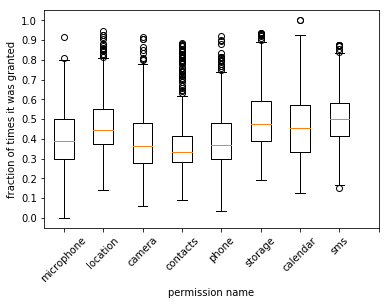

In [5]:
#plot the data:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
#fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'], dfPermissions['fraction of apps granted phone'], dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sensor'],dfPermissions['fraction of apps granted sms']
#fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sensor'],dfPermissions['fraction of apps granted sms']]
fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms']]
#fractionPermissions=[dfPermissions['fraction of apps granted contacts'], dfPermissions['fraction of apps granted camera'],dfPermissions['fraction of apps granted phone'], dfPermissions['fraction of apps granted microphone'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted sms'],dfPermissions['fraction of apps granted storage']]

plt.boxplot(fractionPermissions)
plt.xticks([1, 2, 3,4,5,6,7,8,9],['microphone','location','camera','contacts','phone','storage','calendar','sms'])
#plt.xticks([1, 2, 3,4,5,6,7,8,9],['contacts','camera','phone','microphone','calendar','location','sms','storage'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('fraction of times it was granted')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#plt.plot(meanLocation, label='Location')
#plt.legend()
plt.show()

In [6]:
dfFractions.head()

,fraction of apps granted microphone,fraction of apps granted location,fraction of apps granted camera,fraction of apps granted contacts,fraction of apps granted phone,fraction of apps granted storage,fraction of apps granted calendar,fraction of apps granted sensor,fraction of apps granted sms
1,0.238095,0.222222,0.289474,0.090909,0.033333,0.303797,0.125000,0.0,0.153846
10,0.555556,0.803571,0.697674,0.758621,0.696429,0.853333,0.714286,1.0,0.750000
11,0.409091,0.375000,0.250000,0.255319,0.222222,0.350000,0.500000,0.0,0.294118
13,0.200000,0.392857,0.219512,0.272727,0.250000,0.378378,0.142857,0.0,0.360000
14,0.714286,0.354839,0.384615,0.315789,0.363636,0.524590,0.500000,0.0,0.571429


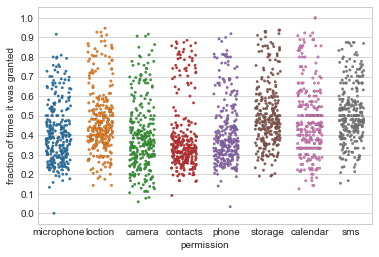

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#np.array(fractionPermissions)#geta slice of the data frame for plotting
dfFractions=dfPermissions.loc[:, 'fraction of apps granted microphone':'fraction of apps granted sms']
dfFractions.columns = ['microphone', 'loction', 'camera','contacts','phone','storage','calendar','sensor','sms']
#remove sensors
dfFractions=dfFractions.drop(['sensor'], axis=1)
#dfFractions
#iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
ax=sns.stripplot(data=dfFractions, jitter=0.3,size=2.5,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='permission', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()
#sns.despine()

In [8]:
#prepare danger data


query = ("select a.*, b.danger from permissions a, survey2 b where a.`TurkerID`=b.`TurkerID` and a.targetSDK>22")

cursor.execute(query)


#for (x) in cursor:
  #print("{}".format(x))

requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}

with open('dangerLevel_out.csv','w') as out:
    #myFields = ['TurkerID', 'number of permissions requested for microphone', 'number of permissions requested for location', 'number of permissions requested for camera', 'number of permissions requested for contacts', 'number of permissions requested for phone', 'number of permissions requested for storage', 'number of permissions requested for calendar','number of permissions requested sensor','number of permissions requested sms','number of permissions granted for microphone', 'number of permissions granted for location', 'number of permissions granted for camera', 'number of permissions granted for contacts', 'number of permissions granted for phone', 'number of permissions granted for storage', 'number of permissions granted for calendar','number of permissions granted sensor','number of permissions granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    myFields = ['TurkerID','randomint', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    prevTurk = 'nonsense'
    check = -1
    for row in cursor:
        if row[1] != prevTurk:
                if check != -1:
                    
                    #writer.writerow({'TurkerID':prevTurk,'number of permissions requested for microphone':requestedPerm['MICROPHONE'], 'number of permissions requested for location':requestedPerm['LOCATION'], 'number of permissions requested for camera':requestedPerm['CAMERA'], 'number of permissions requested for contacts':requestedPerm['CONTACTS'], 'number of permissions requested for phone':requestedPerm['PHONE'], 'number of permissions requested for storage':requestedPerm['STORAGE'], 'number of permissions requested for calendar':requestedPerm['CALENDAR'],'number of permissions requested sensor':requestedPerm['SENSORS'],'number of permissions requested sms':requestedPerm['SMS'],'number of permissions granted for microphone':grantedPerm['MICROPHONE'], 'number of permissions granted for location':grantedPerm['LOCATION'], 'number of permissions granted for camera':grantedPerm['CAMERA'], 'number of permissions granted for contacts':grantedPerm['CONTACTS'], 'number of permissions granted for phone':grantedPerm['PHONE'], 'number of permissions granted for storage':grantedPerm['STORAGE'], 'number of permissions granted for calendar':grantedPerm['CALENDAR'],'number of permissions granted sensor':grantedPerm['SENSORS'],'number of permissions granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    writer.writerow({'TurkerID':prevTurk,'randomint':rndint,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    prevTurk = row[1]
                    rndint=row[2]
                    #re-initialize
                    requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                
                else:
                    check = 1
                    prevTurk = row[1]
    
    
        
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
            
        rrPerm = rPerm.split(',')
        ggPerm = gPerm.split(',')
            
        for x in rrPerm:
            x = x.strip()
            if x != '':
                requestedPerm[x] = requestedPerm[x] + 1
        for y in ggPerm:
            y = y.strip()
            if y != '':
                grantedPerm[y] = grantedPerm[y] + 1
        
        danger = row[11].split(',')
        rndint=row[2]


dfDanger = pandas.read_csv('dangerLevel_out.csv',sep=',')
        
#cursor.close()
#cnx.close()

location=dfDanger['number of apps granted location']/dfDanger['number of apps requested location']
camera=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera']
contacts=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts']
microphone=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone']
calendar=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar']
storage=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage']
phone=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone']
sms=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms']
sensors=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor']

permissionCounts=[location,camera,contacts,microphone,calendar,storage,phone,sms,sensors]
#permissionsFractions=[location.mean(),camera.mean(),contacts.mean(),microphone.mean(),calendar.mean(),storage.mean(),phone.mean(),sms.mean(),sensors.mean()]
permissionNames=['location','camera','contacts','microphone','calendar','storage','phone','sms']
permissionsFractions=[location.mean(),camera.mean(),contacts.mean(),microphone.mean(),calendar.mean(),storage.mean(),phone.mean(),sms.mean()]

'''
plt.plot(permissionsFractions,'o')
plt.xticks([0, 1, 2,3,4,5,6,7],['location','camera','contacts','microphone','calendar','storage','phone','sms'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('Mean of fraction of times it was granted')
plt.show()
'''

"\nplt.plot(permissionsFractions,'o')\nplt.xticks([0, 1, 2,3,4,5,6,7],['location','camera','contacts','microphone','calendar','storage','phone','sms'])\nplt.xticks(rotation=45)\nplt.xlabel('permission name')\nplt.ylabel('Mean of fraction of times it was granted')\nplt.show()\n"

## TODO:
The data is paired (in each permission we have data points from all users). So, for location we have 309, for calendar we have 309 and so on.
******careful: after filtering the data for >5 requests, we may not have the same number of points for each permission

### Use repeated meaures ANOVA

In [ ]:
#dfPermissions=dfPermissions[dfPermissions['number of apps requested sensor']>5]
########FILTER for >5 apps requesting the permission
########skip the ones with -1 value
########try kruskal wallis
import scipy.stats as stats
#ANOVA
#stats.f_oneway(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone)

#Kruskal-Wallis
#stats.kruskal(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone)
print(stats.kruskal(dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms']))
stats.f_oneway(dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms'])

#calcuate the fraction of allowed permission for each permission (one point for each user)
#dfPermissions.head()        
#cursor.close()
#cnx.close()

from both ANOVA and Kruskal wallis result, we can see that there is a statistically significant difference

### Usage time analysis:

test the hypothesis "Most frequently used apps are less restricted"
In other words: the higher the usage time, the higher the number of granted permissions"

Usage time data is optional. And 249 out of 309 (80%) gave us permission to collect usage time.

We can see from the plot that there is no specific correlation between the two variables. Also, the pearson correlation result shows that there is no correlation between the two variables (r=0.04). So, there is no support for this hypothesis. Thus, we cannot argue that there is a relationship between usage time and granted permissions.




In [ ]:
#prepare usage time data


query = ("select a.* , b.`usagetime` from permissions a , usageTime b where a.`TurkerID`=b.`TurkerID` and a.`appName`=b.`appName` order by b.TurkerID, b.usageTime and a.targetSDK>22")

cursor.execute(query)

with open('UsageOut.csv','w') as out:
    myFields = ['TurkerID', 'randomint', 'appName', 'appType', 'targetSDK', 'requestedPerms', 'grantedPerms', 'usagetime','number of permissions requested','number of permissions granted']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    for row in cursor:
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
        writer.writerow({'TurkerID':row[1], 'randomint':row[2], 'appName':row[3], 'appType':row[4], 'targetSDK':row[5], 'requestedPerms':row[6], 'grantedPerms':row[7], 'usagetime':row[11],'number of permissions requested':len(rPerm.split()),'number of permissions granted':len(gPerm.split())})



        
        
dfUsage = pandas.read_csv('UsageOut.csv',sep=',')
        
#cursor.close()
#cnx.close()

In [ ]:
dfUsage.head()

In [ ]:
#test the hypothesis "Most frequently used apps are less restricted"
#In other words: the higher the usage time, the higher the number of granted permissions"
#stat analysis
from scipy import stats
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#help(pearsonr)

#read usage time file into a dataframe
usagedata=dfUsage

#try again with another filter
#skip the rows with zero requested permissions
usagedata=usagedata[usagedata['number of permissions requested'] > 4]
x=usagedata['usagetime']
y=usagedata['number of permissions granted']/usagedata['number of permissions requested']
#spearmanr(x,y)
pearsonr(x, y)


#plot the usagetime vs. %of granted permissions
#import matplotlib.pyplot as plt
#import numpy as np
#x=np.log(x)
#plt.scatter(x/60,y,marker='.')
#plt.scatter(x/60,y,marker='.')
#plt.xlabel('usage time')
#plt.ylabel('farction of granted permissions')
#plt.xscale('log')
#plt.plot(x,y)
#plt.plot(y)
#plt.show()




In [ ]:
plt.xscale('log')
plt.scatter(x,y,marker='.')
plt.xlabel('usage time')
plt.ylabel('% of granted permissions')
plt.show()

### Comfort level for allowing a permission
calculate the mean comfort level for each participant and store it in a list corrosponding to the permission.
The following lists will have the mean of the comfort level for each participant (dpending on which permission s/he was asked about):
- meanMic
- meanLocation
- meanCamera
- meanContacts
- meanStorage
- meanPhone


In [ ]:
#a function to calculate the mean of a list of integers
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)


#read the survey2 table into a dataframe
surveyData=pandas.read_sql_query("select * from survey2", cnx) 
#focus only on the rows with comfort level not empty or not NA
enabledComfortLevel=surveyData[surveyData['comfortableMic']!='NA']
enabledComfortLevel=enabledComfortLevel[enabledComfortLevel['comfortableMic']!='']

comfortLevelMic=enabledComfortLevel[enabledComfortLevel['permission']=='MICROPHONE']
comfortLevelLocation=enabledComfortLevel[enabledComfortLevel['permission']=='LOCATION']
comfortLevelCamera=enabledComfortLevel[enabledComfortLevel['permission']=='CAMERA']
comfortLevelContacts=enabledComfortLevel[enabledComfortLevel['permission']=='CONTACTS']
comfortLevelStorage=enabledComfortLevel[enabledComfortLevel['permission']=='STORAGE']
comfortLevelPhone=enabledComfortLevel[enabledComfortLevel['permission']=='PHONE']

meanMic=[]
meanLocation=[]
meanCamera=[]
meanContacts=[]
meanStorage=[]
meanPhone=[]

enabledComfortLevel
comfortLevelMic
comfortLevelPhone

############try to focus on users who were asked about 3 or more apps

#microphone
for index, row in comfortLevelMic.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #print(intLevels)
    #print(mean(intLevels))
    #add the mean for the current user to the list
    if len(levels)>2:
        meanMic.append(mean(intLevels))
    
#location
for index, row in comfortLevelLocation.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #add the mean for the current user to the list
    if len(levels)>2:
        meanLocation.append(mean(intLevels))
    
#Camera
for index, row in comfortLevelCamera.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #add the mean for the current user to the list
    if len(levels)>2:       
        meanCamera.append(mean(intLevels))

#Contacts
for index, row in comfortLevelContacts.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
    
    #add the mean for the current user to the list
    if len(levels)>2:
        meanContacts.append(mean(intLevels))

#Phone
for index, row in comfortLevelPhone.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1

    #add the mean for the current user to the list
    if len(levels)>2:
        meanPhone.append(mean(intLevels))

#Storage
for index, row in comfortLevelStorage.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #add the mean for the current user to the list
    if len(levels)>2:
        meanStorage.append(mean(intLevels))
        
        

We can see from the box plot, there are no obvious differences in comfort level between the different permissions.

In [ ]:
#plot the data:
from matplotlib import pyplot as plt
meanPermissions=[meanMic,meanLocation,meanCamera,meanContacts,meanPhone,meanStorage]
plt.boxplot(meanPermissions)
plt.xticks([1, 2, 3,4,5,6],['microphone','location','camera','contacts','phone','storage'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('comfort level for granting the permission')
#plt.plot(meanLocation, label='Location')
#plt.legend()
plt.show()

Compare the comfort level between permissions, both ANOVA and Kruskal Wallis show that there is no significant difference in comfort level among different permissions.

In [ ]:
import scipy.stats as stats
#ANOVA
print(stats.f_oneway(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone))

#Kruskal-Wallis
stats.kruskal(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone)


Is there a relationship between comfort level and whether the user tried to disable a permission? (less comfort level > yes tried to disable) (level (range) vs. disable (binary))


How many people tried to change the permission? Regardless of the comfort level, the majoirty of participants did not change the permission (227 vs. 22) 

In [ ]:
#select changesettingsMic1, count(*) from survey2 where changesettingsMic1!='NA' group by changesettingsMic1
#a function to calculate the mean of a list of integers
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

#read the survey2 table into a dataframe
surveyData=pandas.read_sql_query("select * from survey2", cnx) 
#focus only on the rows with comfort level not empty or not NA
enabledComfortLevel=surveyData[surveyData['comfortableMic']!='NA']
enabledComfortLevel=enabledComfortLevel[enabledComfortLevel['comfortableMic']!='']

meanComfort=[]
disabledPermission=[]
#enabledComfortLevel
#create a new column called mean comfort level
#microphone
for index, row in enabledComfortLevel.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #print(intLevels)
    #print(mean(intLevels))
    #add the mean for the current user to the list
    if len(levels)>2:
        meanComfort.append(mean(intLevels))
        disabledPermission.append(row['changesettingsMic1'])#add this here to have the same list length
#meanComfort  
#combine the two lists into a dataframe:
comfortVSdisabled = pandas.DataFrame(
    {'meanComfort': meanComfort,
     'disabledPermission': disabledPermission})

#now plot meanComfort vs. tried to disable (yes,No)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#np.array(fractionPermissions)#geta slice of the data frame for plotting
#dfFractions=dfPermissions.loc[:, 'fraction of apps granted microphone':'fraction of apps granted sms']
#dfFractions.columns = ['microphone', 'loction', 'camera','contacts','phone','storage','calendar','sensor','sms']
#remove sensors
#dfFractions=dfFractions.drop(['sensor'], axis=1)
#dfFractions
#iris = sns.load_dataset('iris')
sns.stripplot(x="disabledPermission", y="meanComfort",data=comfortVSdisabled, jitter=0.2,size=4,linewidth=0.5)
sns.despine()

### Danger level analysis:
Find correlation between users’ perception of danger and whether they enabled/disabled it.


In [ ]:
#prepare danger data


query = ("select a.*, b.danger from permissions a, survey2 b where a.`TurkerID`=b.`TurkerID` and a.targetSDK>22")

cursor.execute(query)


#for (x) in cursor:
  #print("{}".format(x))

requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}

with open('dangerLevel_out.csv','w') as out:
    #myFields = ['TurkerID', 'number of permissions requested for microphone', 'number of permissions requested for location', 'number of permissions requested for camera', 'number of permissions requested for contacts', 'number of permissions requested for phone', 'number of permissions requested for storage', 'number of permissions requested for calendar','number of permissions requested sensor','number of permissions requested sms','number of permissions granted for microphone', 'number of permissions granted for location', 'number of permissions granted for camera', 'number of permissions granted for contacts', 'number of permissions granted for phone', 'number of permissions granted for storage', 'number of permissions granted for calendar','number of permissions granted sensor','number of permissions granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    prevTurk = 'nonsense'
    check = -1
    for row in cursor:
        if row[1] != prevTurk:
                if check != -1:
                    
                    #writer.writerow({'TurkerID':prevTurk,'number of permissions requested for microphone':requestedPerm['MICROPHONE'], 'number of permissions requested for location':requestedPerm['LOCATION'], 'number of permissions requested for camera':requestedPerm['CAMERA'], 'number of permissions requested for contacts':requestedPerm['CONTACTS'], 'number of permissions requested for phone':requestedPerm['PHONE'], 'number of permissions requested for storage':requestedPerm['STORAGE'], 'number of permissions requested for calendar':requestedPerm['CALENDAR'],'number of permissions requested sensor':requestedPerm['SENSORS'],'number of permissions requested sms':requestedPerm['SMS'],'number of permissions granted for microphone':grantedPerm['MICROPHONE'], 'number of permissions granted for location':grantedPerm['LOCATION'], 'number of permissions granted for camera':grantedPerm['CAMERA'], 'number of permissions granted for contacts':grantedPerm['CONTACTS'], 'number of permissions granted for phone':grantedPerm['PHONE'], 'number of permissions granted for storage':grantedPerm['STORAGE'], 'number of permissions granted for calendar':grantedPerm['CALENDAR'],'number of permissions granted sensor':grantedPerm['SENSORS'],'number of permissions granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    prevTurk = row[1]
                    #re-initialize
                    requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                
                else:
                    check = 1
                    prevTurk = row[1]
    
    
        
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
            
        rrPerm = rPerm.split(',')
        ggPerm = gPerm.split(',')
            
        for x in rrPerm:
            x = x.strip()
            if x != '':
                requestedPerm[x] = requestedPerm[x] + 1
        for y in ggPerm:
            y = y.strip()
            if y != '':
                grantedPerm[y] = grantedPerm[y] + 1
        
        danger = row[8].split(',')
        


dfDanger = pandas.read_csv('dangerLevel_out.csv',sep=',')
        
#cursor.close()
#cnx.close()

Participants percieved the danger of permissions differently, with the calendar the least dangerous and the location the most dangerous.


## TODO: Add the confidence interval to the mean plot


In [ ]:
#plot the perception of permission danger 
permissionsMeans=[dfDanger['danger level of location'].mean(),dfDanger['danger level of camera'].mean(),dfDanger['danger level of contacts'].mean(),dfDanger['danger level of microphone'].mean(),dfDanger['danger level of calendar'].mean(),dfDanger['danger level of storage'].mean(),dfDanger['danger level of phone'].mean(),dfDanger['danger level of sms'].mean(),dfDanger['danger level of sensor'].mean()]
print(permissionsMeans)
#plt.scatter(permissionNames,permissionsMeans)
plt.plot(permissionsMeans,'o')
plt.xticks([0, 1, 2,3,4,5,6,7,8],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('mean of the danger level perception (for all participants)')
plt.show()

#dfDangerOnly=dfDanger.loc[:, 'danger level of microphone':'danger level of sms']
#dfDangerOnly.columns = ['microphone', 'loction', 'camera','contacts','phone','storage','calendar','sensor','sms']

#warnings.filterwarnings('ignore')
#sns.set_style("whitegrid")
#ax=sns.stripplot(data=dfDangerOnly, jitter=0.3,size=3,linewidth=0.2)
#sns.axes_style("whitegrid") 
#ax.set(xlabel='perception of danger for sensor', ylabel='fraction of times it was granted')
#ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.set(xticks=['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors']))

#plt.show()


import scipy.stats as stats
#ANOVA
stats.f_oneway(dfDanger['danger level of location'],dfDanger['danger level of camera'],dfDanger['danger level of contacts'],dfDanger['danger level of microphone'],dfDanger['danger level of calendar'],dfDanger['danger level of storage'],dfDanger['danger level of phone'],dfDanger['danger level of sms'],dfDanger['danger level of sensor'])
#Kruskal-Wallis
print(stats.kruskal(dfDanger['danger level of location'],dfDanger['danger level of camera'],dfDanger['danger level of contacts'],dfDanger['danger level of microphone'],dfDanger['danger level of calendar'],dfDanger['danger level of storage'],dfDanger['danger level of phone'],dfDanger['danger level of sms'],dfDanger['danger level of sensor']))

plot the mean of the fraction of time each permission was granted against the perception of danger
Since the location was perceived to be the most dangerous, we would like to see if it was granted fewer times than the others.
And for the calendar whether it was granted more since it was percived as least dangerous.

We can see from the plot that:
Eventhough the location is perceived to be most dangerous , it was granted more times than the other permissions.
For example, location was granted more than the calendar although it was perceived more danerouse.
We expected some kind of negative correlation between the two variables, but it's not showing in our data. The pearson correlation is not statistically significant. (r=-0.2 , p>0.5)

In [ ]:

location=dfDanger['number of apps granted location']/dfDanger['number of apps requested location']
camera=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera']
contacts=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts']
microphone=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone']
calendar=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar']
storage=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage']
phone=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone']
sms=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms']
sensors=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor']

permissionCounts=[location,camera,contacts,microphone,calendar,storage,phone,sms,sensors]
permissionsFractions=[location.mean(),camera.mean(),contacts.mean(),microphone.mean(),calendar.mean(),storage.mean(),phone.mean(),sms.mean(),sensors.mean()]
permissionNames=['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors']

permissionsPerceptionMeans=[dfDanger['danger level of location'].mean(),dfDanger['danger level of camera'].mean(),dfDanger['danger level of contacts'].mean(),dfDanger['danger level of microphone'].mean(),dfDanger['danger level of calendar'].mean(),dfDanger['danger level of storage'].mean(),dfDanger['danger level of phone'].mean(),dfDanger['danger level of sms'].mean(),dfDanger['danger level of sensor'].mean()]

print(pearsonr(permissionsPerceptionMeans, permissionsFractions))

#plot the mean of the fraction of time each permission was granted against the perception of danger
y=permissionsPerceptionMeans[0]
x=permissionsFractions[0]
plt.plot(x, y, 'X', label='Location')

y=permissionsPerceptionMeans[1]
x=permissionsFractions[1]

plt.plot(x, y, 'o', label='Camera')

y=permissionsPerceptionMeans[2]
x=permissionsFractions[2]

plt.plot(x, y, 'o', label='Contacts')

y=permissionsPerceptionMeans[3]
x=permissionsFractions[3]

plt.plot(x, y, 'o', label='Microphone')


y=permissionsPerceptionMeans[4]
x=permissionsFractions[4]

plt.plot(x, y, '*', label='calendar')

y=permissionsPerceptionMeans[5]
x=permissionsFractions[5]

plt.plot(x, y, 'o', label='storage')

y=permissionsPerceptionMeans[6]
x=permissionsFractions[6]

plt.plot(x, y, 'o', label='phone')

y=permissionsPerceptionMeans[7]
x=permissionsFractions[7]

plt.plot(x, y, 'o', label='sms')

#y=permissionsPerceptionMeans[8]
#x=permissionsFractions[8]

#plt.plot(x, y, 'o', label='sensors')

#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(1.0, 5.0)
plt.xlabel('Mean of fraction of times it was granted')
plt.ylabel('mean of the danger level perception (for all participants)')
plt.show()




#plt.figure()
#plt.boxplot(permissionCounts)
#plt.xticks([1, 2, 3,4,5,6,7,8,9],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
#plt.xticks(rotation=45)
#plt.xlabel('permission name')
#plt.ylabel('fraction of times it was granted')
#plt.show()


#plt.scatter(permissionNames,permissionsMeans)
#plt.plot(permissionsFractions,'o')
#plt.xticks([0, 1, 2,3,4,5,6,7,8],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
#plt.xticks(rotation=45)
#plt.xlabel('permission name')
#plt.ylabel('mean of the number of times it was granted (for all participants)')
#plt.show()




In [ ]:
#stat analysis
from scipy import stats
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
#help(pearsonr)


#calculate the correlation between the perception of danger and number of times the permission was granted
#data = pandas.read_csv('/Users/QN/Desktop/THIRD crowdperm/Analysis code/dangerLevel_out.csv', sep=',', na_values=".")
#data=dfDanger
#location
x=dfDanger['danger level of location']
y=dfDanger['number of apps granted location']/dfDanger['number of apps requested location']
#spearmanr(x,y)
location=pearsonr(x, y)


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of location'],y=dfDanger['number of apps granted location']/dfDanger['number of apps requested location'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for location', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

plt.show()

#mic
x=dfDanger['danger level of microphone']
y=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone']
mic=pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of microphone'],y=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for microphone', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

plt.show()

#camera
x=dfDanger['danger level of camera']
y=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera']
camera=pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of camera'],y=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for camera', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#plt.show()

#contacts
x=dfDanger['danger level of contacts']
y=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts']
contacts =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of contacts'],y=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for contacts', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#phone
x=dfDanger['danger level of phone']
y=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone']
phone =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of phone'],y=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for phone', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#storage
x=dfDanger['danger level of storage']
y=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage']
storage =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of storage'],y=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for storage', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#skip the rows with zero requested permissions
dfDanger=dfDanger[dfDanger['number of apps requested sensor'] > 0]
dfDanger=dfDanger[dfDanger['number of apps requested sms'] > 0]

#sms
x=dfDanger['danger level of sms']
y=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms']
sms =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of sms'],y=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for sms', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#calendar
x=dfDanger['danger level of calendar']
y=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar']
calendar =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of calendar'],y=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for calendar', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#sensor
x=dfDanger['danger level of sensor']
y=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor']
sensor =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of sensor'],y=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for sensor', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

print("Location correlation: ")
print(location)

print("Camera correlation: ")
print(camera)

print("Microphone correlation: ")
print(mic)

print("Phone correlation: ")
print(phone)

print("Contacts correlation: ")
print(contacts)

print("Storage correlation: ")
print(storage)

print("sms correlation: ")
print(sms)

print("sensor correlation: ")
print(sensor)

print("calendar correlation: ")
print(calendar)
#plt.plot(x,y)
#plt.show()

# <font color='blue'>Story question:</font>

We asked participants whether they have ever had problems using an app after disabling a permission. If they say yes, we get more details from them regarding the problem, the permission that caused it, the name of the app that they had problems with, in addition to how they dealt with the issue.

Which permissions cause issues more than others?

The <b>Location</b> then <b>Camera</b> permissions are more problamtic than others.

In [27]:
#run the following query in mysql:
#update survey2 set storyCode=(select Qcode from codes where codes.TurkerID=survey2.TurkerID)


#update the MYSQL table with the latest code values
#run the following query in mysql:
#update survey2 set storyCode=(select Qcode from codes where codes.TurkerID=survey2.TurkerID)

query = ("select  storyPermission, count(*) from survey2 where storyPermission!=\"NA\" and storyCode is not NULL group by storyPermission order by count(*) DESC")
#cursor.execute(query)

#read the survey2 table into a dataframe
storyPermissions=pandas.read_sql_query(query, cnx) 
#remove the i don't remember values
#storyPermissions=storyPermissions[storyPermissions['storyPermission']!='I donâ€™t remember']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in storyPermissions.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
print ("Permission that caused a problem\t", "count\t\t","%")
for index, row in storyPermissions.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    if row['storyPermission']=='Phone' or row['storyPermission']=='Camera' :
        print (row['storyPermission'],"\t\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)
    elif row['storyPermission']=='I donâ€™t remember':
        print ('I don\'t remember',"\t\t\t", row['count(*)'],"\t\t","%.2f" % p)
    else:
        print (row['storyPermission'],"\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)

Permission that caused a problem	 count		 %
Location 				 37 		 33.64
Camera 					 27 		 24.55
I don't remember 			 15 		 13.64
Microphone 				 12 		 10.91
Contacts 				 9 		 8.18
Storage 				 8 		 7.27
Phone 					 2 		 1.82


### codes and counts for each code:

We coded participants answers regarding the issues that they faced. Two researches did the coding independently and got together and agreed on a codebook then re-coded a set of the stories. Then we calculated the choens Kappa inter-rater agreement. The Cohen's Kappa value is 0.71 which indicates a substantail agreement between the two coders.
And agreement percentage is 85%.

We started with 118 stories 
we discarded 8 of them becuase they were not clear and we ended up with 110 stories

In the code book, we have 4 different codes: Functionality-app, Functionality-feature,unnessesary permission, and mistrust the app. The difference between the first two codes is that the first one is related to an app that ceased to work without a permission while the second one is related to a specific feature in an app that didn't work without a permission.

Examples for each code:

<b>Functionality-app</b>:"I got an error saying the app would not function without the permission"

<b>Functionality-feature</b>:"Could not locate me to verify location for attendance in class."

<b>unnessesary permission</b>:"They wanted access to a bunch of settings that I did not think were necessary for that app 
functionality."

<b>mistrust the app</b>:"did not want my contacts to be added to my account"




/* First step: open coding <<< google it 
we agreed intial code book
re-coded 
after the re-coding we reached agreement of 0.71
then we sat together to discuss the stories that we did not agree on, until we reached ## agreement
Agreement % is
96.36363636363636
0.85876418663303911


*/
https://stackoverflow.com/questions/11528150/inter-rater-agreement-in-python-cohens-kappa/38403052#38403052

In [2]:
#update the MYSQL table with the latest code values
#run the following query in mysql:
#update survey2 set storyCode=(select Qcode from codes where codes.TurkerID=survey2.TurkerID)

#query = ("select  storyCode, count(*), storySolve from survey2 where storyCode!=\"\" and storyCode!=\"nothing\" group by storyCode order by count(*) DESC")

query = ("select  storyCode, count(*)  from survey2 where storyCode is not NULL and storyCode!=\"nothing\" group by storyCode order by count(*) DESC")

#read the survey2 table into a dataframe
storyCode=pandas.read_sql_query(query, cnx) 

#calculate the total, to be able to calculate the percentage
#total=0
#for index1, row1 in storyCode.iterrows():
#    total=total+row1['count(*)']
    
uness=0
app=0
feat=0
mistrust=0

print ("Code\t\t\t\t\t\t\t", "count\t\t","%")
for index, row in storyCode.iterrows():
    if "," in row['storyCode']:
        a,b=row['storyCode'].split(",")

        if a=="Functionality-app" or b=="Functionality-app":
            app=app+1

        if a=="Functionality-feature" or b=="Functionality-feature":
            feat=feat+1

        if a=="unnessesary permission" or b=="unnessesary permission":
            uness=uness+1

        if a=="mistrust the app" or b=="mistrust the app":
            mistrust=mistrust+1

#now calculate the total
total=0
for index, row in storyCode.iterrows():  
    if row['storyCode']=="Functionality-app" or row['storyCode']=="Functionality-feature" or row['storyCode']=="unnessesary permission" or row['storyCode']=="mistrust the app":
         total=total+row['count(*)']
#now add the previous counts to the total:
total=total+app+feat+uness+mistrust

#now print the groups with their caounts
for index, row in storyCode.iterrows():
    p=0
    if row['storyCode']=="Functionality-app":
        p=(row['count(*)']+app)/total*100
        print (row['storyCode'],"\t\t\t\t\t", row['count(*)']+app,"\t\t","%.2f" % p)
       # if row['storySolve']!="Nothing":
        #    totalApp=row['count(*)']+app
    
    
    if row['storyCode']=="Functionality-feature":
        p=(row['count(*)']+feat)/total*100
        print (row['storyCode'],"\t\t\t\t\t", row['count(*)']+feat,"\t\t","%.2f" % p)
       # if row['storySolve']!="Nothing":
       #     totalFeat=row['count(*)']+feat
            
    if row['storyCode']=="unnessesary permission":
        p=(row['count(*)']+uness)/total*100

        print (row['storyCode'],"\t\t\t\t\t", row['count(*)']+uness,"\t\t","%.2f" % p)
       # if row['storySolve']!="Nothing":
       #     totalUness=row['count(*)']+uness
            
    if row['storyCode']=="mistrust the app":
        p=(row['count(*)']+mistrust)/total*100
        print (row['storyCode'],"\t\t\t\t\t", row['count(*)']+mistrust,"\t\t","%.2f" % p)  
       # if row['storySolve']!="Nothing":
        #    totalMistrust=row['count(*)']+mistrust
            
#print (totalApp,totalFeat,totalUness,totalMistrust)

Code							 count		 %
Functionality-app 					 50 		 45.05
Functionality-feature 					 46 		 41.44
unnessesary permission 					 7 		 6.31
mistrust the app 					 8 		 7.21


### How they solved the issue: Re-enabled the permission vs. uninstalled the app (counts)
35% of participants uninstalled the app((Answering R2.b): R2.b: Do users stop using apps because they become unusable with some permissions disabled such as the location permission?)

In [16]:
query = ("select storySolve,count(*) from survey2 where storySolve!=\"NA\" and storySolve not like \"Other%\" and storyCode is not NULL group by storySolve order by count(*) DESC")
#cursor.execute(query)


storySolve=pandas.read_sql_query(query, cnx) 

#remove the i don't remember values
#storySolve=storyPermissionsCodes[storyPermissionsCodes['storyPermission']!='I donâ€™t remember']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in storySolve.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
print ("How they solved the issue\t\t", "count\t\t\t","%")
for index, row in storySolve.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    if row['storySolve']=='Re-enabled the permission':
        print (row['storySolve'],"\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    elif row['storySolve']=='Uninstalled the app':
        print (row['storySolve'],"\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    else:
        print (row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    

How they solved the issue		 count			 %
Re-enabled the permission 		 65 			 59.09
Uninstalled the app 			 39 			 35.45
Nothing 				 6 			 5.45


### connection between codes and Re-enabled the permission vs. uninstalled the app (counts):

We can see that if the problem is related to functionality of the app (either feater or app related), most participants re-enabled the permissions. Hoever, the percentage of participants who uninstalled the app due to the app didn't work is higher than this related to a specific feature that didn't work (35% vs. 26%).
On the contrary, if the problem was related  or an unnessesary permission all participants uninstalled the app. And when the problem was related to mistrusting the apps, most participants uninstalled the app.


In [3]:
#select storyCode,storySolve,count(*) from survey2 where storySolve!="NA" and storySolve!="Nothing" and storyCode!="nothing" and storyCode!="" and storyCode not like "%,%" group by storyCode,storySolve order by storyCode,storySolve
#select storyCode,storySolve,count(*) from survey2 where storySolve!="NA" and storySolve!="Nothing" and storyCode!="nothing" and storyCode!="" group by storyCode,storySolve order by storyCode,storySolve

query = ("select storyCode,storySolve,count(*) from survey2 where storySolve!=\"NA\" and storySolve!=\"Nothing\" and storyCode!=\"nothing\" and storyCode is not NULL  group by storyCode,storySolve order by storyCode,storySolve")
#cursor.execute(query)


storySolveCodes=pandas.read_sql_query(query, cnx) 

unessRe=0
appRe=0
featRe=0
mistrustRe=0

unessUn=0
appUn=0
featUn=0
mistrustUn=0

totalApp=0
totalFeat=0
totalUness=0
totalMistrust=0


query1=("select storyCode from survey2 where storySolve!=\"Nothing\" and storyCode!=\"nothing\"  and storyCode is not NULL")
totals=pandas.read_sql_query(query1, cnx)
for index, row in totals.iterrows():
    #print(row['storyCode'])
    if "Functionality-app" in row['storyCode']:
        totalApp=totalApp+1
    if "Functionality-feature" in row['storyCode']:
        totalFeat=totalFeat+1
    if "unnessesary permission" in row['storyCode']:
        totalUness=totalUness+1
    if "mistrust the app" in row['storyCode']:
        totalMistrust=totalMistrust+1


print ("Code\t\t\t","How solved\t\t\t","total for the code", "\tcount\t","% (per code group)")
for index, row in storySolveCodes.iterrows():
    if "," in row['storyCode']:
        a,b=row['storyCode'].split(",")

        if (a=="Functionality-app" or b=="Functionality-app") and row['storySolve']=='Re-enabled the permission':
            appRe=appRe+1

        if (a=="Functionality-feature" or b=="Functionality-feature")  and row['storySolve']=='Re-enabled the permission':
            featRe=featRe+1

            
            
        if (a=="unnessesary permission" or b=="unnessesary permission") and row['storySolve']=='Re-enabled the permission':
            unessRe=unessRe+1

        if (a=="mistrust the app" or b=="mistrust the app") and row['storySolve']=='Re-enabled the permission':
            mistrustRe=mistrustRe+1

            
            
        if (a=="Functionality-app" or b=="Functionality-app") and row['storySolve']=='Uninstalled the app':
            appUn=appUn+1

        if (a=="Functionality-feature" or b=="Functionality-feature")  and row['storySolve']=='Uninstalled the app':
            featUn=featUn+1

            
            
        if (a=="unnessesary permission" or b=="unnessesary permission") and row['storySolve']=='Uninstalled the app':
            unessUn=unessUn+1

        if (a=="mistrust the app" or b=="mistrust the app") and row['storySolve']=='Uninstalled the app':
            mistrustUn=mistrustUn+1          


#now calculate the total
total=0

for index, row in storySolveCodes.iterrows():  
    if row['storyCode']=="Functionality-app" or row['storyCode']=="Functionality-feature" or row['storyCode']=="unnessesary permission" or row['storyCode']=="mistrust the app":
         total=total+row['count(*)']
#now add the previous counts to the total:
total=total+appRe+featRe+unessRe+mistrustRe+appUn+featUn+unessUn+mistrustUn

#print (totalApp,totalFeat,totalUness,totalMistrust)
#now print the groups with their caounts
for index, row in storySolveCodes.iterrows():
    p=0
    if row['storyCode']=="Functionality-app" and row['storySolve']=='Re-enabled the permission':
        p=(row['count(*)']+appRe)/totalApp*100
        print (row['storyCode'],"\t",row['storySolve'],"\t",totalApp,"\t\t\t", row['count(*)']+appRe,"\t\t","%.2f" % p)
    
    if row['storyCode']=="Functionality-app" and row['storySolve']=='Uninstalled the app':
        p=(row['count(*)']+appUn)/totalApp*100
        print (row['storyCode'],"\t\t",row['storySolve'],"\t",totalApp,"\t\t\t", row['count(*)']+appUn,"\t\t","%.2f" % p)
        
    if row['storyCode']=="Functionality-feature" and row['storySolve']=='Re-enabled the permission':
        p=(row['count(*)']+featRe)/totalFeat*100
        print ("\n",row['storyCode'],"\t",row['storySolve'],"\t",totalFeat,"\t\t\t", row['count(*)']+featRe,"\t\t","%.2f" % p)
    
    if row['storyCode']=="Functionality-feature" and row['storySolve']=='Uninstalled the app':
        p=(row['count(*)']+featUn)/totalFeat*100
        print (row['storyCode'],"\t\t",row['storySolve'],"\t",totalFeat,"\t\t\t", row['count(*)']+featUn,"\t\t","%.2f" % p)
        
    if row['storyCode']=="unnessesary permission" and row['storySolve']=='Re-enabled the permission':
        p=(row['count(*)']+unessRe)/totalUness*100
        print (row['storyCode'],"\t",row['storySolve'],"\t",totalUness,"\t\t\t", row['count(*)']+unessRe,"\t\t","%.2f" % p)
    
    if row['storyCode']=="unnessesary permission" and row['storySolve']=='Uninstalled the app':
        p=(row['count(*)']+unessUn)/totalUness*100
        print ("\n",row['storyCode'],"\t",row['storySolve'],"\t",totalUness,"\t\t\t", row['count(*)']+unessUn,"\t\t","%.2f" % p)
        

    if row['storyCode']=="mistrust the app" and row['storySolve']=='Re-enabled the permission':
        p=(row['count(*)']+ mistrustRe)/totalMistrust*100
        print ("\n",row['storyCode'],"\t",row['storySolve'],"\t",totalMistrust,"\t\t\t", row['count(*)']+ mistrustRe,"\t\t","%.2f" % p)
    
    if row['storyCode']=="mistrust the app" and row['storySolve']=='Uninstalled the app':
        p=(row['count(*)']+ mistrustUn)/totalMistrust*100
        print (row['storyCode'],"\t\t",row['storySolve'],"\t",totalMistrust,"\t\t\t", row['count(*)']+ mistrustUn,"\t\t","%.2f" % p)

Code			 How solved			 total for the code 	count	 % (per code group)
Functionality-app 	 Re-enabled the permission 	 51 			 32 		 62.75
Functionality-app 		 Uninstalled the app 	 51 			 18 		 35.29

 Functionality-feature 	 Re-enabled the permission 	 42 			 31 		 73.81
Functionality-feature 		 Uninstalled the app 	 42 			 11 		 26.19

 mistrust the app 	 Re-enabled the permission 	 9 			 2 		 22.22
mistrust the app 		 Uninstalled the app 	 9 			 5 		 55.56

 unnessesary permission 	 Uninstalled the app 	 9 			 7 		 77.78


### Is there a connection between how they solved the issue and specific permissions? (e.g. for location they re-enble while for camera they uninstall)

In [4]:
query = ("select  storyPermission,storySolve,count(*) from survey2 where storySolve!=\"NA\" and storySolve not like \"Other%\" and storyCode is not NULL  group by storySolve,storyPermission order by storyPermission, count(*) DESC")

storySolveAndPermission=pandas.read_sql_query(query, cnx) 

#remove the i don't remember values
storySolveAndPermission=storySolveAndPermission[storySolveAndPermission['storyPermission']!='I donâ€™t remember']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in storySolveAndPermission.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
print ("permission\t\t\t","How solved\t\t\t\t\t", "count\t\t\t","%")
for index, row in storySolveAndPermission.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    if row['storySolve']=='Uninstalled the app' and (row['storyPermission']=='Camera' or row['storyPermission']=='Phone'):
        #print (row['storyPermission'],"\t\t\t",row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
        print (row['storyPermission'],"\t\t\t\t",row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    elif row['storySolve']=='Uninstalled the app' and (row['storyPermission']!='Camera' and row['storyPermission']!='Phone'):
        #print (row['storyPermission'],"\t\t\t",row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
        print (row['storyPermission'],"\t\t\t",row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    elif row['storySolve']=='Re-enabled the permission' and (row['storyPermission']=='Camera' or row['storyPermission']=='Phone'):
        #print (row['storyPermission'],"\t\t\t",row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
        print (row['storyPermission'],"\t\t\t\t",row['storySolve'],"\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    
    elif row['storySolve']=='Nothing' and (row['storyPermission']=='Camera' or row['storyPermission']=='Phone'):
        #print (row['storyPermission'],"\t\t\t",row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
        print (row['storyPermission'],"\t\t\t\t",row['storySolve'],"\t\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
   
    elif row['storySolve']=='Nothing' and (row['storyPermission']!='Camera' and row['storyPermission']!='Phone'):
        #print (row['storyPermission'],"\t\t\t",row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
        print (row['storyPermission'],"\t\t\t",row['storySolve'],"\t\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    else:
        print (row['storyPermission'],"\t\t\t",row['storySolve'],"\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    #elif row['storyPermission']=='I donâ€™t remember':
     #   print (row['storyPermission'],"\t\t\t", row['count(*)'],"\t\t","%.2f" % p)
    #else:
     #   print (row['storyPermission'],"\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)

permission			 How solved					 count			 %
Camera 				 Re-enabled the permission 			 15 			 15.79
Camera 				 Uninstalled the app 				 10 			 10.53
Camera 				 Nothing 					 2 			 2.11
Contacts 			 Re-enabled the permission 			 5 			 5.26
Contacts 			 Uninstalled the app 				 3 			 3.16
Contacts 			 Nothing 					 1 			 1.05
Location 			 Re-enabled the permission 			 26 			 27.37
Location 			 Uninstalled the app 				 9 			 9.47
Location 			 Nothing 					 2 			 2.11
Microphone 			 Re-enabled the permission 			 7 			 7.37
Microphone 			 Uninstalled the app 				 5 			 5.26
Phone 				 Re-enabled the permission 			 1 			 1.05
Phone 				 Uninstalled the app 				 1 			 1.05
Storage 			 Re-enabled the permission 			 5 			 5.26
Storage 			 Uninstalled the app 				 3 			 3.16


### Is there a connection between codes and specific permissions? (e.g. app is not working without the location)



In [6]:
query = ("select storyCode,storyPermission,count(*) from survey2 where storyPermission!=\"NA\" and storyCode!=\"nothing\" and storyCode is not NULL group by storyCode,storyPermission order by count(*) DESC")
#cursor.execute(query)


storyPermissionsCodes=pandas.read_sql_query(query, cnx) 

#remove the i don't remember values
storyPermissionsCodes=storyPermissionsCodes[storyPermissionsCodes['storyPermission']!='I donâ€™t remember']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in storyPermissionsCodes.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
print ("code\t\t\t\t","Permission\t\t", "count\t\t","%")
for index, row in storyPermissionsCodes.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    if row['storyCode']=='Functionothinglity-feature' or "," in row['storyCode']:
        print (row['storyCode'],"\t",row['storyPermission'],"\t\t", row['count(*)'],"\t\t","%.2f" % p)
    else:
        print (row['storyCode'],"\t\t",row['storyPermission'],"\t\t", row['count(*)'],"\t\t","%.2f" % p)
    #elif row['storyPermission']=='I donâ€™t remember':
     #   print (row['storyPermission'],"\t\t\t", row['count(*)'],"\t\t","%.2f" % p)
    #else:
     #   print (row['storyPermission'],"\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)


query = ("select storySolve,count(*) from survey2 where storySolve!=\"NA\" and storySolve not like \"Other%\" and storyCode is not NULL  group by storySolve order by count(*) DESC")
#cursor.execute(query)


storySolve=pandas.read_sql_query(query, cnx) 

#remove the i don't remember values
#storySolve=storyPermissionsCodes[storyPermissionsCodes['storyPermission']!='I donâ€™t remember']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in storySolve.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
print ("How they solved the issue\t\t", "count\t\t\t","%")
for index, row in storySolve.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    if row['storySolve']=='Re-enabled the permission':
        print (row['storySolve'],"\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    elif row['storySolve']=='Nothing':
         print (row['storySolve'],"\t\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
    else:
        print (row['storySolve'],"\t\t\t", row['count(*)'],"\t\t\t","%.2f" % p)
     #   print (row['storyCode'],"\t\t",row['storyPermission'],"\t\t", row['count(*)'],"\t\t","%.2f" % p)
    #elif row['storyPermission']=='I donâ€™t remember':
     #   print (row['storyPermission'],"\t\t\t", row['count(*)'],"\t\t","%.2f" % p)
    #else:
     #   print (row['storyPermission'],"\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)



code				 Permission		 count		 %
Functionality-feature 		 Location 		 18 		 18.95
Functionality-app 		 Location 		 16 		 16.84
Functionality-feature 		 Camera 		 15 		 15.79
Functionality-app 		 Camera 		 8 		 8.42
Functionality-app 		 Contacts 		 8 		 8.42
Functionality-app 		 Microphone 		 5 		 5.26
Functionality-feature 		 Storage 		 5 		 5.26
Functionality-feature 		 Microphone 		 4 		 4.21
mistrust the app 		 Microphone 		 3 		 3.16
Functionality-app 		 Storage 		 2 		 2.11
unnessesary permission 		 Location 		 2 		 2.11
unnessesary permission 		 Storage 		 1 		 1.05
Functionalty-feature 		 Camera 		 1 		 1.05
Functionality-feature, unnessesary permission 	 Camera 		 1 		 1.05
Functionality-app 		 Phone 		 1 		 1.05
unnessesary permission,mistrust the app 	 Camera 		 1 		 1.05
mistrust the app 		 Contacts 		 1 		 1.05
unnessesary permission,mistrust the app 	 Phone 		 1 		 1.05
Functionality-feature,mistrust the app 	 Camera 		 1 		 1.05
mistrust the app 		 Location 		 1 		 1.05
Ho

### If re-enabled: how many temp?
Most participants (73%) permanently enabled the permission for the app and never disabled it again. And (27%) of them temporarily enabled the permission for the app (for a specific time) then disabeld it later.

#### (Answering R2.a): R2.a: Are users running into issues related to granular control? Do they feel like they *have* to enable certain permissions due to lack of choice?
And the difference in comfort level of the decision of re-enabling vs. uninstalling supports this finding. That users feel like they have to enable a permission due to lack of choice aven though they're not comfortable with it.

In [66]:
query = ("select storyTempEnable, count(*) from survey2 where storyTempEnable!=\"NA\" and storyTempEnable!=\"\" and storyCode is not NULL group by storyTempEnable")

storyReEnabled=pandas.read_sql_query(query, cnx) 

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in storyReEnabled.iterrows():
    total=total+row1['count(*)']
    
print ("Re-enabled\t\t", "count\t\t","%")
for index, row in storyReEnabled.iterrows():
    p=row['count(*)']/total*100
    if row['storyTempEnable']=="I permanently enabled the permission for the app and never disabled it again":
        print ("Permanently","\t\t", row['count(*)'],"\t\t","%.2f" % p)
    else:
        print ("Temporarily","\t\t", row['count(*)'],"\t\t","%.2f" % p)

Re-enabled		 count		 %
Permanently 		 34 		 72.34
Temporarily 		 13 		 27.66


### If uninstalled: how many re-installed? How many found alternative?
Most participants (94%) did not re-install the app later. And slightly more than half of them (58%) found and install an alternative app.


#### (Answering R2.b):  R2.b: Do users stop using apps because they become unusable with some permissions disabled such as the location permission?


In [67]:
#select storyReinstall, count(*) from survey2 where storyReinstall!="NA" and storyReinstall!="" group by storyReinstall
#select storyOtherApp, count(*) from survey2 where storyOtherApp!="NA" and storyOtherApp!="" group by storyOtherApp

query = ("select storyReinstall, count(*) from survey2 where storyReinstall!=\"NA\" and storyReinstall!=\"\" and storyCode is not NULL group by storyReinstall")

storyReinstall=pandas.read_sql_query(query, cnx) 

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in storyReinstall.iterrows():
    total=total+row1['count(*)']
    
print ("Re-installed the app later\t\t", "count\t\t","%")
for index, row in storyReinstall.iterrows():
    p=row['count(*)']/total*100
    print (row['storyReinstall'],"\t\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)  
    

print("")

query = ("select storyOtherApp, count(*) from survey2 where storyOtherApp!=\"NA\" and storyOtherApp!=\"\" and storyCode is not NULL group by storyOtherApp")
storyOtherApp=pandas.read_sql_query(query, cnx) 

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in storyOtherApp.iterrows():
    total=total+row1['count(*)']
    
print ("Installed an alternative app\t\t", "count\t\t","%")
for index, row in storyOtherApp.iterrows():
    p=row['count(*)']/total*100
    print (row['storyOtherApp'],"\t\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p) 

Re-installed the app later		 count		 %
No 					 29 		 93.55
Yes 					 2 		 6.45

Installed an alternative app		 count		 %
No 					 18 		 58.06
Yes 					 13 		 41.94


#### Comfort level of decsion (re-enabled vs. uninstalled:)
When participant slove apps usability issues by uninstalling the apps that caused them problems related to permissions, they are more comfortable about their decision compared to when they re-enable permissions.

TODO: run chi-square test

In [21]:
#look at the story questions
#a function to calculate the mean of a list of integers
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

#select * from survey2 where story !='No'
#in stories:
#compare the comfort level for re-enabling the permission vs. deleting the app 
from scipy.stats.stats import mannwhitneyu
from scipy.stats.stats import ttest_ind

#read the survey2 table into a dataframe
surveyData=pandas.read_sql_query("select * from survey2 where storyCode is not NULL", cnx) 
#focus only on stories
stories=surveyData[surveyData['storySolve']!='NA']

#coding the comfort level questions for stories
storyUninstallComfort=[]
storyEnableComfort=[]
for index, row in stories.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    if row['storyUninstallComfort'] == 'strongly agree':
        storyUninstallComfort.append(5)
    if row['storyUninstallComfort'] == 'agree':
        storyUninstallComfort.append(4)
    if row['storyUninstallComfort'] == 'neutral':
        storyUninstallComfort.append(3)
    if row['storyUninstallComfort'] == 'disagree':
        storyUninstallComfort.append(2)
    if row['storyUninstallComfort'] == 'strongly disagree':
        storyUninstallComfort.append(1)
        
    if row['storyEnableComfort'] == 'strongly agree':
        storyEnableComfort.append(5)
    if row['storyEnableComfort'] == 'agree':
        storyEnableComfort.append(4)
    if row['storyEnableComfort'] == 'neutral':
        storyEnableComfort.append(3)
    if row['storyEnableComfort'] == 'disagree':
        storyEnableComfort.append(2)
    if row['storyEnableComfort'] == 'strongly disagree':
        storyEnableComfort.append(1)

        
x=storyEnableComfort
y=storyUninstallComfort
print(mean(x))
print(mean(y))
mannwhitneyu(x, y, use_continuity=True, alternative=None)
#ttest_ind(x, y, axis=0, equal_var=True)

3.574468085106383
4.483870967741935


MannwhitneyuResult(statistic=319.5, pvalue=5.7516667744095509e-06)

#### The most installed apps by our participants (only look into apps installed by users (ignore the pre-installed system apps)):

Add this to the DB:
update appCategories a set numOfInstallsDB=(select count(*) from permissions b where appType='user' and targetSDK>22 and a.appName=b.appName)

update permissionsWithAllInfo a set numOfInstallsStore=(select `NumOfInstallsStore` from appCategories b where a.appName=b.appName)
update permissionsWithAllInfo a set rating=(select `rating` from appCategories b where a.appName=b.appName)
update permissionsWithAllInfo a set category=(select Category1 from appCategories b where a.appName=b.appName)


In [ ]:

query = ("select distinct appName, targetSDK, count(*) from permissions where appType='user' and targetSDK>22 group by appName order by count(*) DESC ")
mostInstalled=pandas.read_sql_query(query, cnx) 

#remove the Apps Survey app (our app) from thw list
mostInstalled=mostInstalled[mostInstalled['appName']!='Apps Survey']

print ("App name\t\t\t\t\t", "count\t\t")
for index, row in mostInstalled.iterrows():
    print (row['appName'],"\t\t\t\t\t", row['count(*)'],"\t\t\t\t\t",row['targetSDK']) 

#prepare  data with counts
#query = ("select a.* , b.`usagetime` from permissions a , usageTime b where a.`TurkerID`=b.`TurkerID` and a.`appName`=b.`appName` order by b.TurkerID, b.usageTime and a.targetSDK>22 and appType='user'")
query = ("select * from permissions a where targetSDK>22 and appType='user'")

cursor.execute(query)

with open('out.csv','w') as out:
    myFields = ['TurkerID', 'randomint', 'appName', 'appType', 'targetSDK', 'requestedPerms', 'grantedPerms','number of permissions requested','number of permissions granted']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    for row in cursor:
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
        writer.writerow({'TurkerID':row[1], 'randomint':row[2], 'appName':row[3], 'appType':row[4], 'targetSDK':row[5], 'requestedPerms':row[6], 'grantedPerms':row[7],'number of permissions requested':len(rPerm.split()),'number of permissions granted':len(gPerm.split())})
      
        
dfUsage = pandas.read_csv('out.csv',sep=',')
#the result has only 13k rows because we're focusing on user apps with target SDK>22


#dfUsage.head()
#cursor.close()
#cnx.close()

### plot the top apps along with their number of requested permissions:


In [ ]:
#top apps
#Messenger,Instagram ,Spotify,Netflix,Facebook,Twitter,eBay,PayPal,Walmart,Pinterest,Amazon Music,Duo,Pandora,Smart Switch, Yelp, Uber
topApps=["Messenger","Instagram" ,"Spotify","Netflix","Facebook","Twitter","eBay","PayPal","Walmart","Pinterest","Amazon Music","Duo","Pandora","Smart Switch", "Yelp", "Uber"]
#topAppsDF
app1=dfUsage[dfUsage['appName']==topApps[0]]
app1=app1[app1['appType']=='user']
app1['fraction granted']= app1['number of permissions granted']/app1['number of permissions requested']


app2=dfUsage[dfUsage['appName']==topApps[1]]
app2=app2[app2['appType']=='user']
app2['fraction granted']= app2['number of permissions granted']/app2['number of permissions requested']


app3=dfUsage[dfUsage['appName']==topApps[2]]
app3=app3[app3['appType']=='user']
app3['fraction granted']= app3['number of permissions granted']/app3['number of permissions requested']


app4=dfUsage[dfUsage['appName']==topApps[3]]
app4=app4[app4['appType']=='user']
app4['fraction granted']= app4['number of permissions granted']/app4['number of permissions requested']


app5=dfUsage[dfUsage['appName']==topApps[4]]
app5=app5[app5['appType']=='user']
app5['fraction granted']= app5['number of permissions granted']/app5['number of permissions requested']

app6=dfUsage[dfUsage['appName']==topApps[5]]
app6=app6[app6['appType']=='user']
app6['fraction granted']= app6['number of permissions granted']/app6['number of permissions requested']

app7=dfUsage[dfUsage['appName']==topApps[6]]
app7=app7[app7['appType']=='user']
app7['fraction granted']= app7['number of permissions granted']/app7['number of permissions requested']

app8=dfUsage[dfUsage['appName']==topApps[7]]
app8=app8[app8['appType']=='user']
app8['fraction granted']= app8['number of permissions granted']/app8['number of permissions requested']


app9=dfUsage[dfUsage['appName']==topApps[8]]
app9=app9[app9['appType']=='user']
app9['fraction granted']= app9['number of permissions granted']/app9['number of permissions requested']

app10=dfUsage[dfUsage['appName']==topApps[9]]
app10=app10[app10['appType']=='user']
app10['fraction granted']= app10['number of permissions granted']/app10['number of permissions requested']

#create a dataframe from the fraction of granted of others
#pd.concat([df1['c'], df2['c']], axis=1, keys=['df1', 'df2'])
                                                                                                                                                                                                                                                                                                                    
topAppsDF=pandas.concat([app1['number of permissions requested'],app2['number of permissions requested'],app3['number of permissions requested'],app4['number of permissions requested'],app5['number of permissions requested'],app6['number of permissions requested'],app7['number of permissions requested'],app8['number of permissions requested'],app9['number of permissions requested'],app10['number of permissions requested']],axis=1, keys=['messenger', 'Instagram','Spotify','Netflix','Facebook','Twitter','eBay','PayPal','Walmart','Pinterest'])
#topAppsDF=pandas.concat([app1['fraction granted']],axis=1, keys=['messenger'])

topAppsDF
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
ax=sns.stripplot(data=topAppsDF, jitter=0.3,size=2.5,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='app name', ylabel='number of requested permissions')
#ax.set(yticks=[0,1,2,3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()


### plot the top apps along with their fraction of granted permissions:


In [ ]:
#top apps
#Messenger,Instagram ,Spotify,Netflix,Facebook,Twitter,eBay,PayPal,Walmart,Pinterest,Amazon Music,Duo,Pandora,Smart Switch, Yelp, Uber
topApps=["Messenger","Instagram" ,"Spotify","Netflix","Facebook","Twitter","eBay","PayPal","Walmart","Pinterest","Amazon Music","Duo","Pandora","Smart Switch", "Yelp", "Uber"]
#topAppsDF
app1=dfUsage[dfUsage['appName']==topApps[0]]
app1=app1[app1['appType']=='user']
app1['fraction granted']= app1['number of permissions granted']/app1['number of permissions requested']


app2=dfUsage[dfUsage['appName']==topApps[1]]
app2=app2[app2['appType']=='user']
app2['fraction granted']= app2['number of permissions granted']/app2['number of permissions requested']


app3=dfUsage[dfUsage['appName']==topApps[2]]
app3=app3[app3['appType']=='user']
app3['fraction granted']= app3['number of permissions granted']/app3['number of permissions requested']


app4=dfUsage[dfUsage['appName']==topApps[3]]
app4=app4[app4['appType']=='user']
app4['fraction granted']= app4['number of permissions granted']/app4['number of permissions requested']


app5=dfUsage[dfUsage['appName']==topApps[4]]
app5=app5[app5['appType']=='user']
app5['fraction granted']= app5['number of permissions granted']/app5['number of permissions requested']

app6=dfUsage[dfUsage['appName']==topApps[5]]
app6=app6[app6['appType']=='user']
app6['fraction granted']= app6['number of permissions granted']/app6['number of permissions requested']

app7=dfUsage[dfUsage['appName']==topApps[6]]
app7=app7[app7['appType']=='user']
app7['fraction granted']= app7['number of permissions granted']/app7['number of permissions requested']

app8=dfUsage[dfUsage['appName']==topApps[7]]
app8=app8[app8['appType']=='user']
app8['fraction granted']= app8['number of permissions granted']/app8['number of permissions requested']


app9=dfUsage[dfUsage['appName']==topApps[8]]
app9=app9[app9['appType']=='user']
app9['fraction granted']= app9['number of permissions granted']/app9['number of permissions requested']

app10=dfUsage[dfUsage['appName']==topApps[9]]
app10=app10[app10['appType']=='user']
app10['fraction granted']= app10['number of permissions granted']/app10['number of permissions requested']

#create a dataframe from the fraction of granted of others
#pd.concat([df1['c'], df2['c']], axis=1, keys=['df1', 'df2'])
                                                                                                                                                                                                                                                                                                                    
topAppsDF=pandas.concat([app1['fraction granted'],app2['fraction granted'],app3['fraction granted'],app4['fraction granted'],app5['fraction granted'],app6['fraction granted'],app7['fraction granted'],app8['fraction granted'],app9['fraction granted'],app10['fraction granted']],axis=1, keys=['messenger', 'Instagram','Spotify','Netflix','Facebook','Twitter','eBay','PayPal','Walmart','Pinterest'])
#topAppsDF=pandas.concat([app1['fraction granted']],axis=1, keys=['messenger'])

topAppsDF
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
ax=sns.stripplot(data=topAppsDF, jitter=0.3,size=2.5,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='app name', ylabel='fraction of granted permissions')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#'messenger', 'Instagram','Spotify','Netflix','Facebook','Twitter','eBay','PayPal','Walmart','Pinterest'
#plot the means
messenger=topAppsDF['messenger'].mean()
Instagram=topAppsDF['Instagram'].mean()
Spotify=topAppsDF['Spotify'].mean()
Netflix=topAppsDF['Netflix'].mean()
Facebook=topAppsDF['Facebook'].mean()
Twitter=topAppsDF['Twitter'].mean()
eBay=topAppsDF['eBay'].mean()
PayPal=topAppsDF['PayPal'].mean()
Walmart=topAppsDF['Walmart'].mean()
Pinterest=topAppsDF['Pinterest'].mean()

appsFractions=[messenger,Instagram,Spotify,Netflix,Facebook,Twitter,eBay,PayPal,Walmart,Pinterest]

plt.plot(appsFractions,'o')
plt.xticks([0, 1, 2,3,4,5,6,7,8,9],['Messenger','Instagram','Spotify','Netflix','Facebook','Twitter','eBay','PayPal','Walmart','Pinterest'])
plt.xticks(rotation=45)
plt.xlabel('app name')
plt.ylabel('fraction of granted permissions')
plt.show()

print("Number of requested permissions:",app1['number of permissions requested'].head(),app2['number of permissions requested'].head(),app3['number of permissions requested'].head(),app4['number of permissions requested'].head(),app5['number of permissions requested'].head(),app6['number of permissions requested'].head(),app7['number of permissions requested'].head(),app8['number of permissions requested'].head(),app9['number of permissions requested'].head(),app10['number of permissions requested'].head())




### get the information about the top apps

I looked into the top 50 installed apps in our dataset and got these apps info from the Google Play. I got their categories and number of installs.
To get the number of apps (among the top 50) in each category, run the following:
select Category1, count(*) from appCategories  group by Category1 order by count(*) DESC

For example, in the top 50, there are 5 social networking apps.

To get the number of occurences of apps in each categories in our dataset:
select category, count(*) from permissionsWithAllInfo where category!='NULL' and appType='user' group by category order by count(*) DESC

or:
select Category1, sum(NumOfInstallsDB) from appCategories group by Category1 order by sum(NumOfInstallsDB) DESC

For example, we got 414 occurences for social networking apps (any one of Facebook, Instagramm Twitter....)

In [ ]:
print("The number of distinct apps in each category. Chosen from the top 50 most installed apps in our dataset:\n")

query = ("select Category1, count(*) from appCategories  group by Category1 order by count(*) DESC")
appsInCategories=pandas.read_sql_query(query, cnx) 

print ("App category\t\t\t\t\t", "Number of distinct apps\t\t")
for index, row in appsInCategories.iterrows():
    print (row['Category1'],"\t\t\t\t\t", row['count(*)']) 
    


query = ("select category, count(*) from permissionsWithAllInfo where category!='NULL' and appType='user' group by category order by count(*) DESC")
topCategories=pandas.read_sql_query(query, cnx) 

print("\n\nThere can be more than one app from each user. And an app can be counted more than once but from different users\n")
print ("App category\t\t\t\t\t", "count\t\t")
for index, row in topCategories.iterrows():
    print (row['category'],"\t\t\t\t\t", row['count(*)']) 
    

The communication apps such WhatsApp have the highest granted permissions while the entertainment apps such as Netflix have the lowest


## TODO: try a stack barchart in each category show the 9 permissions, and for each permission show part requeted and part granted

In [ ]:

query = ("select category, count(*) from permissionsWithAllInfo where category!='NULL' and appType='user' group by category order by count(*) DESC")
topCategories=pandas.read_sql_query(query, cnx) 


#focus on the top 6 categories
#cat1=topCategories.iloc[0]['count(*)']
cat1,cat1Cnt=topCategories.iloc[0]['category'], topCategories.iloc[0]['count(*)']
cat2,cat2Cnt=topCategories.iloc[1]['category'],topCategories.iloc[1]['count(*)']
cat3,cat3Cnt=topCategories.iloc[2]['category'],topCategories.iloc[2]['count(*)']
cat4,cat4Cnt=topCategories.iloc[3]['category'],topCategories.iloc[3]['count(*)']
cat5,cat5Cnt=topCategories.iloc[4]['category'],topCategories.iloc[4]['count(*)']
cat6,cat6Cnt=topCategories.iloc[5]['category'],topCategories.iloc[5]['count(*)']

#categories=[cat1,cat2,cat3,cat4,cat5,cat6]
#categoriesCounts=[cat1Cnt,cat2Cnt,cat3Cnt,cat4Cnt,cat5Cnt,cat6Cnt]
#categories

query = ("select * from permissionsWithAllInfo where category!='NULL' and appType='user'")
topCategoriesInfo=pandas.read_sql_query(query, cnx) 

cat1Fraction=topCategoriesInfo[topCategoriesInfo['category']==cat1]
cat1Fraction['fraction granted']= cat1Fraction['numberOfPermissionsGranted']/cat1Fraction['numberOfPermissionsRequested']

cat2Fraction=topCategoriesInfo[topCategoriesInfo['category']==cat2]
cat2Fraction['fraction granted']= cat2Fraction['numberOfPermissionsGranted']/cat2Fraction['numberOfPermissionsRequested']

cat3Fraction=topCategoriesInfo[topCategoriesInfo['category']==cat3]
cat3Fraction['fraction granted']= cat3Fraction['numberOfPermissionsGranted']/cat3Fraction['numberOfPermissionsRequested']

cat4Fraction=topCategoriesInfo[topCategoriesInfo['category']==cat4]
cat4Fraction['fraction granted']= cat4Fraction['numberOfPermissionsGranted']/cat4Fraction['numberOfPermissionsRequested']

cat5Fraction=topCategoriesInfo[topCategoriesInfo['category']==cat5]
cat5Fraction['fraction granted']= cat5Fraction['numberOfPermissionsGranted']/cat5Fraction['numberOfPermissionsRequested']

cat6Fraction=topCategoriesInfo[topCategoriesInfo['category']==cat6]
cat6Fraction['fraction granted']= cat6Fraction['numberOfPermissionsGranted']/cat6Fraction['numberOfPermissionsRequested']

topCatsDF=pandas.concat([cat1Fraction['fraction granted'],cat2Fraction['fraction granted'],cat3Fraction['fraction granted'],cat4Fraction['fraction granted'],cat5Fraction['fraction granted'],cat6Fraction['fraction granted']],axis=1, keys=[cat1, cat2,cat3,cat4,cat5,cat6])
cat1Mean=topCatsDF.iloc[:,0:1].mean()
cat2Mean=topCatsDF.iloc[:,1:2].mean()

cat3Mean=topCatsDF.iloc[:,2:3].mean()
cat4Mean=topCatsDF.iloc[:,3:4].mean()

cat5Mean=topCatsDF.iloc[:,4:5].mean()
cat6Mean=topCatsDF.iloc[:,5:6].mean()


#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

#sns.set_style("whitegrid")
#ax=sns.stripplot(data=topCatsDF, jitter=0.3,size=2.5,linewidth=0.2)
#sns.axes_style("whitegrid") 
#ax.set(xlabel='app category', ylabel='fraction of granted permissions')
#ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#plt.show()


#plot the means
catsFractions=[cat1Mean,cat2Mean,cat3Mean,cat4Mean,cat5Mean,cat6Mean]

plt.plot(catsFractions,'o')
plt.xticks([0, 1, 2,3,4,5],[cat1,cat2,cat3,cat4,cat5,cat6])
plt.xticks(rotation=45)
plt.xlabel('app name')
plt.ylabel('fraction of granted permissions')
plt.show()


The goal is to show which category have higher % of requestd and granted permissions (for each permission individually)

Do a stacked bar chart 
x: categories (the top 5 ones)
bars: 9 permissions 
y: % of apps that requested and granted that permission within each category

In [ ]:
#for entertainment
query=("select count(*) from permissionsWithAllInfo where category='Entertainment'")
total_enter=pandas.read_sql_query(query, cnx)

#requested
query=("select count(*) from permissionsWithAllInfo where category='Entertainment' and requestedPerms like \"%storage%\"")
storageRequested_enter=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Entertainment' and requestedPerms like \"%location%\"")
locationRequested_enter=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Entertainment' and requestedPerms like \"%contacts%\"")
contactsRequested_enter=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Entertainment' and requestedPerms like \"%camera%\"")
cameraRequested_enter=pandas.read_sql_query(query, cnx)

#granted
query=("select count(*) from permissionsWithAllInfo where category='Entertainment' and grantedPerms like \"%storage%\"")
storageGranted_enter=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Entertainment' and grantedPerms like \"%location%\"")
locationGranted_enter=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Entertainment' and grantedPerms like \"%contacts%\"")
contactsGranted_enter=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Entertainment' and grantedPerms like \"%camera%\"")
cameraGranted_enter=pandas.read_sql_query(query, cnx)

print("Entertainment total:", total_enter)
print(storageRequested_enter,locationRequested_enter,contactsRequested_enter,cameraRequested_enter)
print(storageGranted_enter, locationGranted_enter,contactsGranted_enter, cameraGranted_enter)


#for social
query=("select count(*) from permissionsWithAllInfo where category='Social'")
total_social=pandas.read_sql_query(query, cnx)


#requested
query=("select count(*) from permissionsWithAllInfo where category='Social' and requestedPerms like \"%storage%\"")
storageRequested_social=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Social' and requestedPerms like \"%location%\"")
locationRequested_social=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Social' and requestedPerms like \"%contacts%\"")
contactsRequested_social=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Social' and requestedPerms like \"%camera%\"")
cameraRequested_social=pandas.read_sql_query(query, cnx)

#granted
query=("select count(*) from permissionsWithAllInfo where category='Social' and grantedPerms like \"%storage%\"")
storageGranted_social=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Social' and grantedPerms like \"%location%\"")
locationGranted_social=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Social' and grantedPerms like \"%contacts%\"")
contactsGranted_social=pandas.read_sql_query(query, cnx)

query=("select count(*) from permissionsWithAllInfo where category='Social' and grantedPerms like \"%camera%\"")
cameraGranted_social=pandas.read_sql_query(query, cnx)

print("social total:", total_social)
print(storageRequested_social,locationRequested_social,contactsRequested_social,cameraRequested_social)
print(storageGranted_social, locationGranted_social,contactsGranted_social, cameraGranted_social)



In [ ]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

#tuples are [requested for Entertainme,granted for Entertainme] for Entertainme, [requested,granted] for social..... 
#storage=([[239/457 ,  26/457],
    #   [ 429/430 ,  287/430]])


#Location=([[ 77/457 ,  1/457],
     #  [ 429/430 , 222/430]])

storage=([[239/256 ,  26/256],
       [ 429/716 ,  287/716]])


Location=([[ 77/78 ,  1/78],
       [ 429/651 , 222/651]])

#Contacts=([[ 14/457 ,  14/457],
#       [ 69/430 , 69/430]])
Contacts=([[ 14/28 ,  14/28],
       [ 69/138 , 69/138]])


#Camera=([[ 76/457 ,  9/457],
#       [ 378/430 , 175/430]])
Camera=([[ 76/85 ,  9/85],
       [ 378/553 , 175/553]])


#storage=([[239 ,  26],
#       [ 429 ,  287]])


#Location=([[ 77 ,  1],
 #      [ 429 , 222]])

#Contacts=([[ 14/457 ,  14/457],
#       [ 69/430 , 69/430]])
#Contacts=([[ 14 ,  14],
 #      [ 69 , 69]])


#Camera=([[ 76/457 ,  9/457],
#       [ 378/430 , 175/430]])
#Camera=([[ 76 ,  9],
 #      [ 378 , 175]])

# create fake dataframes
'''
df1 = pd.DataFrame(a,
                   index=["A", "B"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(a,
                   index=["A", "B"],
                   columns=["I", "J", "K", "L", "M"])
'''
df1 = pd.DataFrame(storage,
                   index=["Entertainment", "Social"],
                   columns=["Requested", "Granted"])
df2 = pd.DataFrame(Location,
                   index=["Entertainment", "Social"],
                   columns=["Requested", "Granted"])
df3 = pd.DataFrame(Contacts,
                   index=["Entertainment", "Social"],
                   columns=["Requested", "Granted"])
df4 = pd.DataFrame(Camera,
                   index=["Entertainment", "Social"],
                   columns=["Requested", "Granted"])
#df2 = pd.DataFrame(b,index=["A", "B", "C", "D"],columns=["I", "J", "K", "L", "M"])
#df3 = pd.DataFrame(np.random.rand(4, 5),index=["A", "B", "C", "D"], columns=["I", "J", "K", "L", "M"])

#df4 = pd.DataFrame(np.random.rand(4, 5),index=["Entertainment", "Social"], columns=["I", "J", "K", "L", "M"])
#df5 = pd.DataFrame(np.random.rand(4, 5),index=["A", "B", "C", "D"], columns=["I", "J", "K", "L", "M"])

'''
df4 = pd.DataFrame(columns=["type","Location", "Camera","Contacts",
                           "Storage","Microphone"], 
                  data=[["Requested",10,50,81,31,17],
                        ["Granted",22,50,81,51,71]], index=["Location", "Camera","Contacts",
                           "Storage","Microphone"])
df5 = pd.DataFrame(columns=["type","Location", "Camera","Contacts",
                           "Storage","Microphone"], 
                  data=[["Requested",10,50,81,31,17],
                        ["Granted",22,50,81,51,71]],index=["Location", "Camera","Contacts",
                          "Storage","Microphone"])
                          
''' 
# Then, just call :
#plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"])
plot_clustered_stacked([df1,df2,df3,df4],["Storage","Location","Contacts","Camera"])
#plot_clustered_stacked([df4, df5],["df4", "df5"])

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
#blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


In [ ]:
list(zip(df['greenBars'], df['orangeBars']))
print(df['greenBars'])
print(list(zip(df['greenBars'], totals)))
print(totals)
print(greenBars)
#greenBars

In [ ]:
#close DB connection
cnx.close()